## Final Project

## Predicting the probability of a stroke

Import libraries and dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from pprint import pprint
from scipy import stats
import psycopg2
from sqlalchemy import create_engine
import psycopg2.extras as extras
import io

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc
from xgboost import XGBClassifier

In [8]:
def load_file(file_path):
    file_to_read = file_path
    df = pd.read_csv(file_to_read)
    return df
  
df = load_file(r'healthcare-dataset-stroke-data.csv')

Data cleaned for visualizations - outlined in ETL notebook

In [9]:
df = df.fillna(value = df['bmi'].mean())

Removed one instance of a value in lifestyle column that occurs only once

In [10]:
pd.Series(df['gender']).value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
delete_row = df[df["gender"]=='Other'].index
df = df.drop(delete_row)
df = df.drop('id', axis=1)

Final correlation check. Age is highly correlated with ever_married, but that is common sense

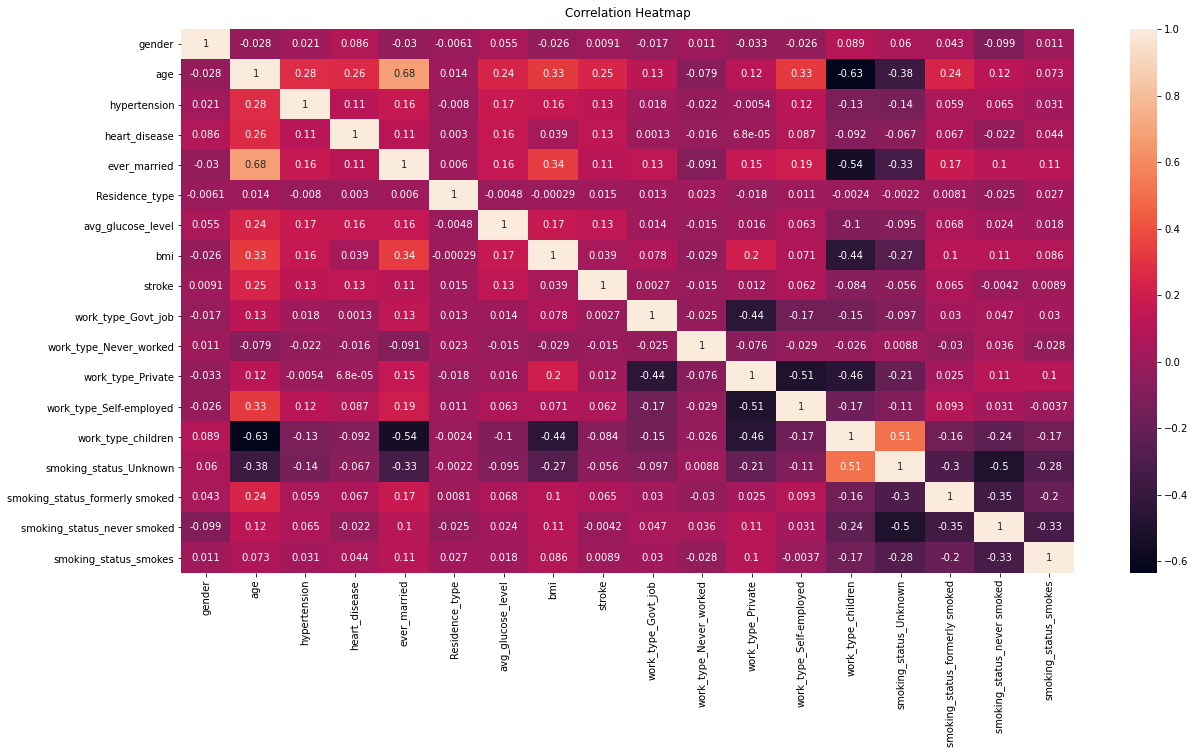

In [14]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(df_ohencoded.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## Pivot Table

In [16]:
df.drop(['heart_disease', 'hypertension','stroke'], axis=1, inplace=True)

In [17]:
piv_table = pd.pivot_table(data=df,index=['gender', 'Residence_type'])
piv_table

age  avg_glucose_level        bmi
gender Residence_type                                         
Female Rural           43.294526         104.056860  29.039528
       Urban           44.200889         104.058718  29.079944
Male   Rural           42.366565         109.580830  28.697184
       Urban           42.598126         108.604977  28.623475

<AxesSubplot:xlabel='gender,Residence_type'>

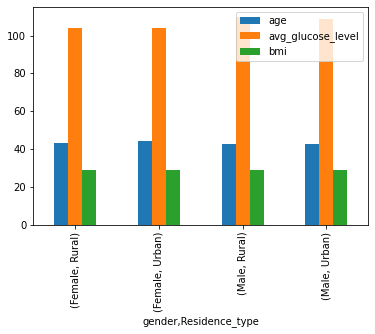

In [18]:
piv_table.plot(kind='bar')

In [19]:
pd.pivot_table(df,index=['gender','Residence_type'],values=['avg_glucose_level', 'bmi'], aggfunc=np.mean)

avg_glucose_level        bmi
gender Residence_type                              
Female Rural                  104.056860  29.039528
       Urban                  104.058718  29.079944
Male   Rural                  109.580830  28.697184
       Urban                  108.604977  28.623475

# Visualization

### Counts of total patient gender vs stroke

Text(0.5, 1.0, 'Gender vs Stroke')

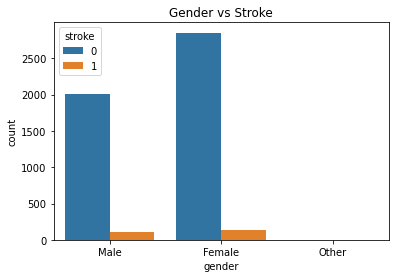

In [61]:
import seaborn as sns
g = sns.countplot(x='gender', hue='stroke', data=df)
g.set_title("Gender vs Stroke")
#plt.savefig('Gender_vs_Stroke.png', dpi=300, bbox_inches='tight')

### Stroke vs age separated by gender

Text(0.5, 1.0, 'Stroke vs Age Separated By Gender')

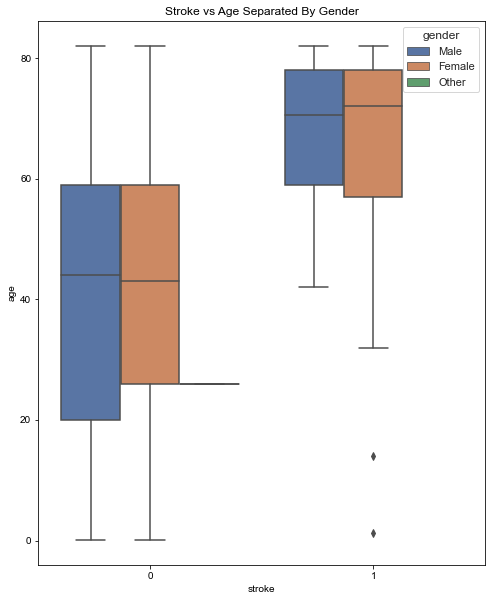

In [62]:
fig, axs = plt.subplots(figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.boxplot(x=df.stroke, y=df.age,hue=df.gender, data = df).set_title('Stroke vs Age Separated By Gender')
#plt.savefig('Stroke_vs_Age_SeparatedBy_Gender.png', dpi=300, bbox_inches='tight')

### Hypertension vs age separated by gender

Text(0.5, 1.0, 'Hypertension vs Age Separated BY Gender')

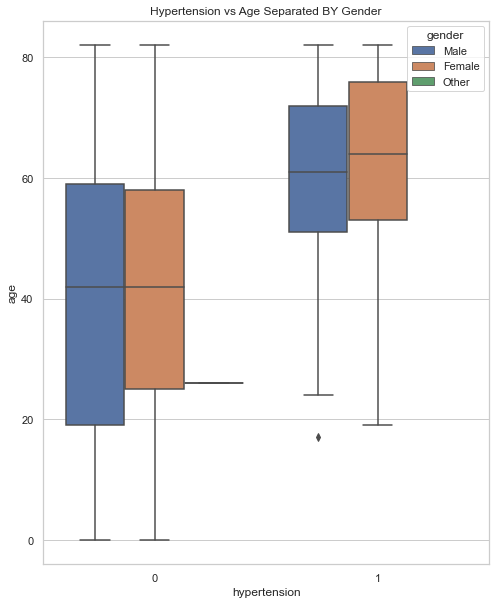

In [63]:
fig, axs = plt.subplots(figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.boxplot(x=df.hypertension, y=df.age,hue=df.gender, data = df).set_title('Hypertension vs Age Separated BY Gender')
#plt.savefig('Hypertension_vs_Age_SeparatedBY_Gender.png', dpi=300, bbox_inches='tight')

### Heart disease vs age separated by gender

Text(0.5, 1.0, 'Heart Disease vs Age SeparatedBY Gender')

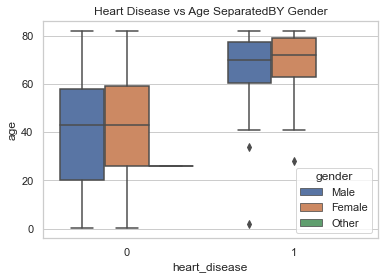

In [64]:
sns.boxplot(x=df.heart_disease, y=df.age,hue=df.gender, data = df).set_title('Heart Disease vs Age SeparatedBY Gender')
#plt.savefig('Heart_Disease_vs_Age_SeparatedBY_Gender.png', dpi=300, bbox_inches='tight')

### Incidence of health conditions by age

Text(0.5, 1.0, 'Age vs hypertension')

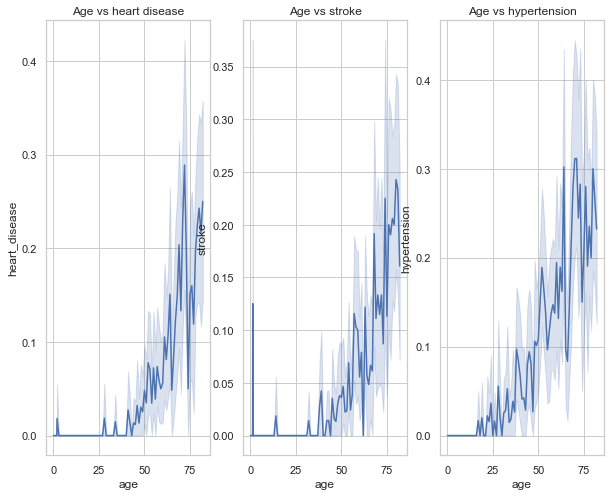

In [65]:
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
sns.lineplot(x=df['age'],y=df['heart_disease'])
plt.title('Age vs heart disease')

plt.subplot(1,3,2)
sns.lineplot(x=df['age'],y=df['stroke'])
plt.title('Age vs stroke')

plt.subplot(1,3,3)
sns.lineplot(x=df['age'],y=df['hypertension'])
plt.title('Age vs hypertension')

#plt.savefig('Health_Conditions_By_Age.png', dpi=300, bbox_inches='tight')

### Number of patients shown by smoking status

<AxesSubplot:ylabel='smoking_status'>

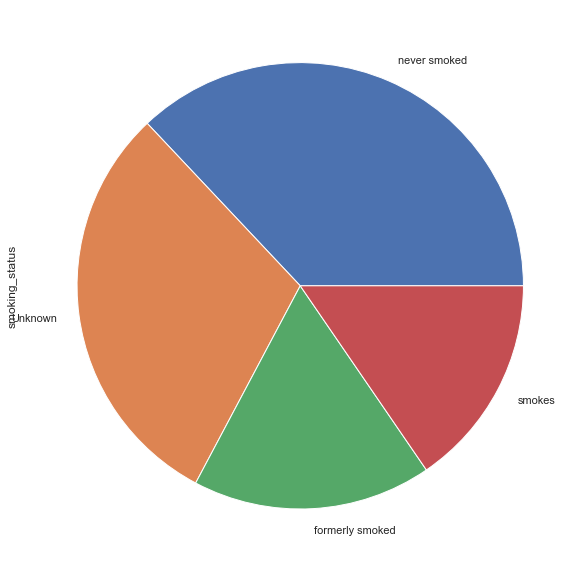

In [66]:
plt.figure(figsize=(10,15))
df['smoking_status'].value_counts().plot(kind='pie')
#plt.savefig('Smoking_Status.png', dpi=300, bbox_inches='tight')

### Incidence of stroke shown in realtion to patient smoking status

In [67]:
# mean stroke by smoking status
fs_mean = df.stroke[df['smoking_status'] == 'formerly smoked'].mean()
sm_mean = df.stroke[df['smoking_status'] == 'smokes'].mean()
ns_mean = df.stroke[df['smoking_status'] == 'never smoked'].mean()
uk_mean = df.stroke[df['smoking_status'] == 'Unknown'].mean()

mean_stroke = [fs_mean, sm_mean, ns_mean, uk_mean]

# smoking status
smoking_status = df['smoking_status'].unique()



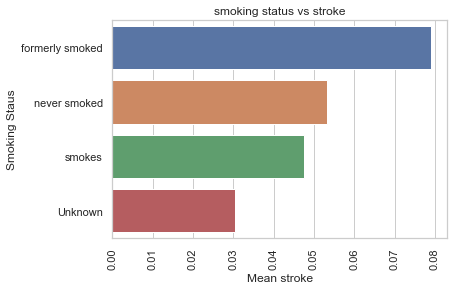

<Figure size 432x288 with 0 Axes>

In [68]:
sns.barplot(x = mean_stroke , y = smoking_status)
plt.title('smoking status vs stroke')
plt.xticks(rotation = 90)
plt.xlabel('Mean stroke')
plt.ylabel('Smoking Staus')
plt.show()
plt.savefig('Smoking_Status_Vs_Stroke.png', dpi=300, bbox_inches='tight')

### Number of patients shown by work type

<AxesSubplot:ylabel='work_type'>

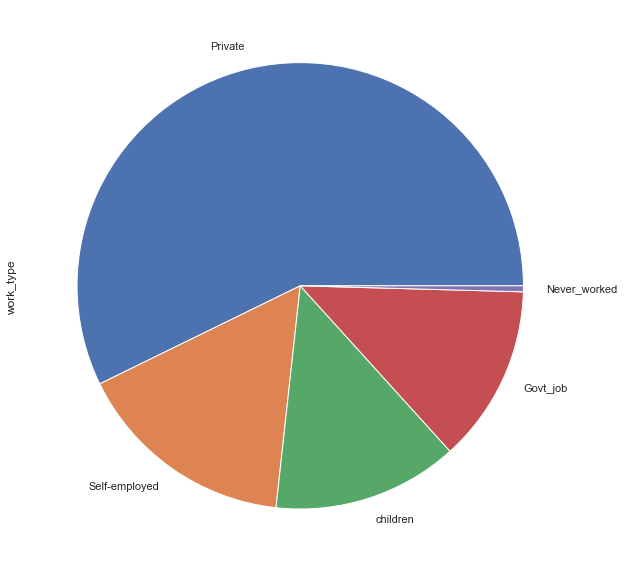

In [69]:
plt.figure(figsize=(10,15))
df['work_type'].value_counts().plot(kind='pie')
#plt.savefig('Work_Type.png', dpi=300, bbox_inches='tight')

## Models

In [13]:
def load_file(file_path):
    file_to_read = file_path
    df = pd.read_csv(file_to_read)
    return df
  
df_ohencoded = load_file(r'df_ohencoded.csv')

In [71]:
df_ohencoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5105,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5106,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5107,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


Setting up the data - separating, train-test split, scaling, and instituting SMOTE

In [72]:
#separate the data to X and y
X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']
# SMOTEless train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 27, stratify = y)
# standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#xtrain and y train with smote
sm = SMOTE(random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


Function to train the models.  The function will loop through each of the models in the list

In [73]:
def evaluate(X_train,y_train,X_test,y_test, smote):
    """Function that loops through several models and produces various scores"""
    models= [['Logistic Regression ',LogisticRegression(random_state = 50, max_iter = 10000)],
            ['KNearest Neighbor ',KNeighborsClassifier(n_neighbors = 285)],
            ['Decision Tree Classifier ',DecisionTreeClassifier(random_state =27, max_depth =2, min_samples_split =3)],
            ['Ada Boost ',AdaBoostClassifier(random_state = 27, n_estimators = 137)],
            ['Bagging', BaggingClassifier(n_estimators = 149, max_samples= 0.6)]]

    for name,model in models:

        model = model
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        roc = roc_auc_score(y_test, y_pred) 
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred) 
        f1 = f1_score(y_test, y_pred) 
        cm_model = confusion_matrix(y_test, y_pred)
        
        if smote == 1:
            print ("Smote Version")

        print(name)
        print('CM Model: ')
        print(cm_model)
        print('Test Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
        print('ROC AUC Score: ', roc)
        print('Precision: ', precision)
        print('Recall: ', recall)
        print('f1: ', f1)

        print('-------------------------------------------------')

Scores without using SMOTE

In [74]:
evaluate(X_train,y_train,X_test,y_test, 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNearest Neighbor 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------
Decision Tree Classifier 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ada Boost 
CM Model: 
[[1458    0]
 [  74    1]]
Test Accuracy:  0.9517286366601435
Training Accuracy:  0.9532997762863534
ROC AUC Score:  0.5066666666666667
Precision:  1.0
Recall:  0.013333333333333334
f1:  0.02631578947368421
-------------------------------------------------
Bagging
CM Model: 
[[1455    3]
 [  75    0]]
Test Accuracy:  0.949119373776908
Training Accuracy:  0.9846196868008948
ROC AUC Score:  0.49897119341563784
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


Models trained with SMOTE sampling

In [75]:
# Scores using SMOTE
evaluate(X_train_smote,y_train_smote,X_test,y_test, 1)

Smote Version
Logistic Regression 
CM Model: 
[[1084  374]
 [  17   58]]
Test Accuracy:  0.7449445531637312
Training Accuracy:  0.7833627278071722
ROC AUC Score:  0.75840877914952
Precision:  0.13425925925925927
Recall:  0.7733333333333333
f1:  0.2287968441814596
-------------------------------------------------
Smote Version
KNearest Neighbor 
CM Model: 
[[894 564]
 [  9  66]]
Test Accuracy:  0.6262230919765166
Training Accuracy:  0.7361845972957084
ROC AUC Score:  0.7465843621399177
Precision:  0.10476190476190476
Recall:  0.88
f1:  0.1872340425531915
-------------------------------------------------
Smote Version
Decision Tree Classifier 
CM Model: 
[[812 646]
 [  5  70]]
Test Accuracy:  0.5753424657534246
Training Accuracy:  0.7748383303938859
ROC AUC Score:  0.7451303155006859
Precision:  0.09776536312849161
Recall:  0.9333333333333333
f1:  0.17699115044247787
-------------------------------------------------
Smote Version
Ada Boost 
CM Model: 
[[493 965]
 [  3  72]]
Test Accuracy

Modeling AdaBoost and Decision Tree with optimizers

In [76]:
#option 1 - the parameters together

def evaluate_2( n_splits, n_repeats, n_jobs):
    models= [['AdaBoost ',AdaBoostClassifier()],
            ['DecisionTree ',DecisionTreeClassifier()]]


    for name,model in models:
        resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
        pipeline=Pipeline(steps=[('r', resample), ('m', model)])
        cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
        scoring=['accuracy','precision_macro','recall_macro']
        scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs)
        print(name)
        print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
        print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
        print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

        print('----------------------------------------')

In [77]:
evaluate_2(10, 3, -1)

AdaBoost 
Mean Accuracy: 0.8353
Mean Precision: 0.5601
Mean Recall: 0.6766
----------------------------------------
DecisionTree 
Mean Accuracy: 0.8593
Mean Precision: 0.5529
Mean Recall: 0.6283
----------------------------------------


In [78]:
#option 2, run the adaboost and decisiontree with kfold individually to adjust the parameters. It is set up with default ones. 
def evaluate_3(model, n_splits = 10, n_repeats = 3, n_jobs = -1, state = 42):
    resample=SMOTEENN(random_state = state, enn=EditedNearestNeighbours(sampling_strategy='all', n_neighbors = 15))
    pipeline=Pipeline(steps=[('r', resample), ('m', model)])
    cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scoring=['accuracy','precision_macro','recall_macro']
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs)
    print(scores['test_recall_macro'])
    print(scores['test_accuracy'])

    print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
    print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
    print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

In [143]:
model=AdaBoostClassifier(random_state =27, n_estimators = 137)
evaluate_3(model)

[0.71975309 0.76329218 0.66432099 0.69300412 0.56489712 0.69711934
 0.62329218 0.51152263 0.69049383 0.74225702 0.74888889 0.60740741
 0.52329218 0.62547325 0.6544856  0.73242798 0.60888889 0.67609053
 0.57197531 0.66435661 0.60534979 0.66946502 0.81609053 0.73814815
 0.66534979 0.73962963 0.70283951 0.62078189 0.71403292 0.6907512 ]
[0.82778865 0.80234834 0.79452055 0.77690802 0.82191781 0.78473581
 0.78864971 0.7925636  0.80821918 0.77299413 0.77495108 0.79452055
 0.77886497 0.86497065 0.73972603 0.74363992 0.76125245 0.78082192
 0.76320939 0.73776908 0.79060665 0.80430528 0.79452055 0.79060665
 0.7964775  0.75733855 0.83170254 0.81996086 0.78082192 0.8258317 ]
Mean Accuracy: 0.7901
Mean Precision: 0.5464
Mean Recall: 0.6682


In [185]:
model_2 = DecisionTreeClassifier(random_state =27, max_depth =2, min_samples_split =3)
evaluate_3(model, n_splits = 10)

[0.71975309 0.76329218 0.66432099 0.69300412 0.56489712 0.69711934
 0.62329218 0.51152263 0.69049383 0.74225702 0.74888889 0.60740741
 0.52329218 0.62547325 0.6544856  0.73242798 0.60888889 0.67609053
 0.57197531 0.66435661 0.60534979 0.66946502 0.81609053 0.73814815
 0.66534979 0.73962963 0.70283951 0.62078189 0.71403292 0.6907512 ]
[0.82778865 0.80234834 0.79452055 0.77690802 0.82191781 0.78473581
 0.78864971 0.7925636  0.80821918 0.77299413 0.77495108 0.79452055
 0.77886497 0.86497065 0.73972603 0.74363992 0.76125245 0.78082192
 0.76320939 0.73776908 0.79060665 0.80430528 0.79452055 0.79060665
 0.7964775  0.75733855 0.83170254 0.81996086 0.78082192 0.8258317 ]
Mean Accuracy: 0.7901
Mean Precision: 0.5464
Mean Recall: 0.6682


### Parameter Tuning

Functions to find the best optimization of each model

#### Ada Boost

Optimizing n_estimators

In [83]:
def optimizeAda(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        abc = AdaBoostClassifier(n_estimators = number)
        abc.fit(X_train_smote, y_train_smote)
        y_pred = abc.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    print('The recall score is ' + str(k))
    print('The optimal n_estimators number is ' + str(n))

optimizeAda(300)
    

The recall score is 0.9466666666666667
The optimal n_estimators number is 25


#### K Nearest Neighbors

In [81]:
# finding the right number of neighbors
def optimize(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        knn = KNeighborsClassifier(n_neighbors = number)
        knn.fit(X_train_smote, y_train_smote)
        y_pred = knn.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b

    print('The recall score is ' + str(k))
    print('The optimal n_neighbor number is ' + str(n))

optimize(300)

The recall score is 0.8666666666666667
The optimal n_neighbor number is 295


#### Decision Tree 

In [85]:
# Fine tuning DecisionTreeClassifier - didn't keep every iteration 
dtc = DecisionTreeClassifier(random_state = 27, max_depth = 2, min_samples_leaf = 5)
dtc.fit(X_train_smote, y_train_smote)
y_pred = dtc.predict(X_test)  
c = accuracy_score(y_test,dtc.predict(X_test))
b = recall_score(y_test, y_pred)

print('The recall score is ' + str(b))
print("accuracy = " + str(c))

The recall score is 0.68
accuracy = 0.7488584474885844


#### Bagging Classifier

Optimizing Estimators

In [50]:
def optimizeBagging(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        bc = BaggingClassifier(n_estimators = number)
        bc.fit(X_train_smote, y_train_smote)
        y_pred = bc.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    print('The recall score is ' + str(k))
    print('The optimal n_estimators number is ' + str(n))

optimizeBagging(300)    

The recall score is 0.6
The optimal n_estimators number is 149


Optimizing max_samples

In [51]:
def optimizeBagging_samples():
    k = 0
    n = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1] 
    for number in n:
        bc = BaggingClassifier(n_estimators = 5, max_samples = number)
        bc.fit(X_train_smote, y_train_smote)
        y_pred = bc.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    print('The recall score is ' + str(k))
    print('The optimal max_samples is ' + str(n))

optimizeBagging_samples()

The recall score is 0.5866666666666667
The optimal max_samples is 0.6
